In [2]:
from pathlib import Path
import os
cwd_path = Path.cwd(); set_path = str(cwd_path.parent.parent); os.chdir(set_path)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%reload_ext autoreload

In [ ]:
from TargetDistributions.DoubleWell import ManyWellEnergy
from FittedModels.utils.plotting_utils import plot_samples_vs_contours_many_well

In [42]:
from FittedModels.Models.FlowModel import FlowModel
from AIS_train.train_AIS import AIS_trainer
from ImportanceSampling.VanillaImportanceSampler import VanillaImportanceSampling
from FittedModels.utils.plotting_utils import plot_history, plot_distributions, plot_samples

import matplotlib.pyplot as plt
import torch
from Utils.plotting_utils import plot_func2D, plot_distribution
from Utils.numerical_utils import MC_estimate_true_expectation
from Utils.numerical_utils import quadratic_function as expectation_function
torch.set_default_dtype(torch.float64)

def plotter(*args, **kwargs):
    # wrap plotting function like this so it displays during training
    plot_samples_vs_contours_many_well(*args, **kwargs)
    plt.show()

In [30]:
dim = 4
target = ManyWellEnergy(dim=dim, a=-0.5, b=-6)

In [31]:
n_samples_expectation = int(1e4)
n_samples=int(1e4)

In [48]:
learnt_sampler = FlowModel(x_dim=dim, scaling_factor=2.0, flow_type="RealNVP", n_flow_steps=60)
tester = AIS_trainer(target, learnt_sampler, loss_type="DReG", n_distributions=20, n_steps_transition_operator=3,
                    step_size=0.5, transition_operator="HMC", train_AIS_params=True, learnt_dist_kwargs={"lr": 1e-4},
                    importance_param_lr=1e-3)

# Visualisation

## Vanilla IS with the flow

In [49]:
vanilla_IS = VanillaImportanceSampling(sampling_distribution=learnt_sampler, target_distribution=target)
expectation_vanilla, info_dict_vanilla = \
vanilla_IS.calculate_expectation(n_samples_expectation, expectation_function=expectation_function)
print(f"ESS is {info_dict_vanilla['effective_sample_size']/n_samples_expectation}, \
      var is {torch.var(info_dict_vanilla['normalised_sampling_weights'])}")

ESS is 0.009623384598293845,       var is 1.0292383659826145e-06


## Hamiltonian HMC

In [50]:
expectation_before, info_dict_before = tester.AIS_train.calculate_expectation(n_samples_expectation,
                                                                    expectation_function=expectation_function)
print(info_dict_before['effective_sample_size'].item() / n_samples_expectation)

0.13202211712681208


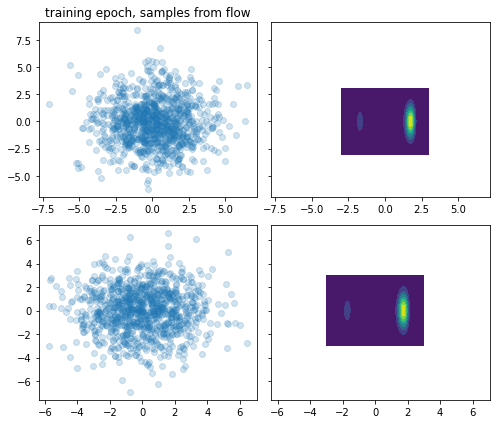

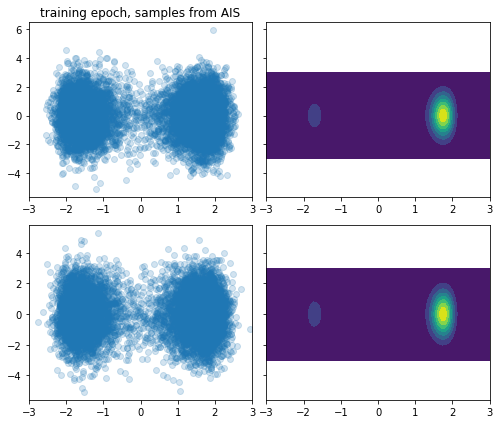

In [51]:
plot_samples_vs_contours_many_well(tester, n_samples=1000,
                                      title=f"training epoch, samples from flow")
plot_samples_vs_contours_many_well(tester, n_samples=None,
                                      title=f"training epoch, samples from AIS",
                                      samples_q=info_dict_before["samples"])

# Train

  0%|          | 0/100 [00:00<?, ?it/s]

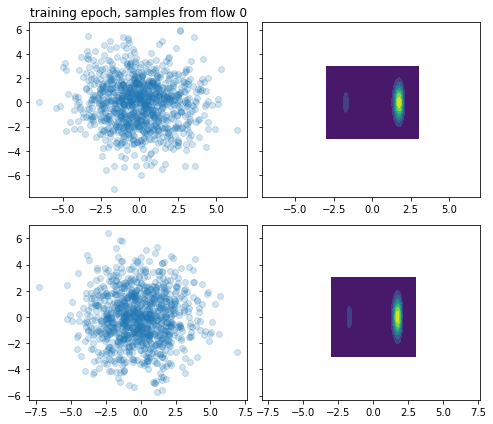

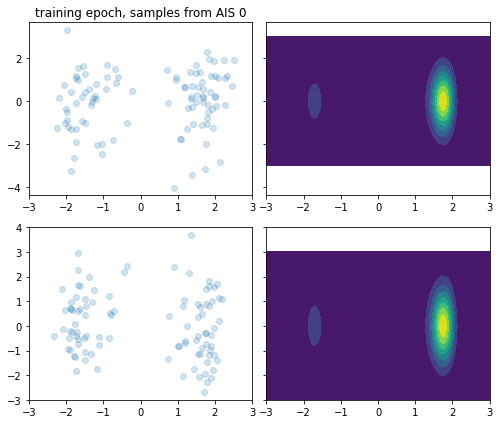

loss: -5.013765299759745,   log_p_x_post_AIS 13.563776117968397, ESS 0.14654835481919387:   4%|▍         | 4/100 [01:23<32:45, 20.47s/it]

The value argument must be within the support


loss: -9.239056958792927,   log_p_x_post_AIS 13.82818231880137, ESS 0.23828149962758263:   7%|▋         | 7/100 [02:25<31:25, 20.27s/it] 

The value argument must be within the support


loss: -9.239056958792927,   log_p_x_post_AIS 13.82818231880137, ESS 0.23828149962758263:   8%|▊         | 8/100 [02:45<30:59, 20.21s/it]

The value argument must be within the support


loss: -9.239056958792927,   log_p_x_post_AIS 13.82818231880137, ESS 0.23828149962758263:   9%|▉         | 9/100 [03:06<30:47, 20.31s/it]

The value argument must be within the support


loss: -9.239056958792927,   log_p_x_post_AIS 13.82818231880137, ESS 0.23828149962758263:  10%|█         | 10/100 [03:26<30:37, 20.42s/it]

The value argument must be within the support


loss: -9.239056958792927,   log_p_x_post_AIS 13.82818231880137, ESS 0.23828149962758263:  11%|█         | 11/100 [03:46<30:10, 20.34s/it]

The value argument must be within the support


loss: -9.239056958792927,   log_p_x_post_AIS 13.82818231880137, ESS 0.23828149962758263:  12%|█▏        | 12/100 [04:06<29:40, 20.23s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  15%|█▌        | 15/100 [05:14<30:27, 21.50s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  16%|█▌        | 16/100 [05:34<29:41, 21.20s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  17%|█▋        | 17/100 [05:55<29:08, 21.07s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  18%|█▊        | 18/100 [06:16<28:32, 20.89s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  19%|█▉        | 19/100 [06:35<27:32, 20.40s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  20%|██        | 20/100 [06:53<26:26, 19.84s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  21%|██        | 21/100 [07:12<25:38, 19.47s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  22%|██▏       | 22/100 [07:29<24:27, 18.82s/it]

The value argument must be within the support


loss: -6.354049729252296,   log_p_x_post_AIS 12.993608051491565, ESS 0.1414213644107285:  23%|██▎       | 23/100 [07:48<24:03, 18.75s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  25%|██▌       | 25/100 [08:28<24:15, 19.41s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  26%|██▌       | 26/100 [08:48<24:07, 19.56s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  27%|██▋       | 27/100 [09:09<24:20, 20.01s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  28%|██▊       | 28/100 [09:29<24:05, 20.07s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  29%|██▉       | 29/100 [09:50<23:54, 20.21s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  30%|███       | 30/100 [10:09<23:18, 19.98s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  31%|███       | 31/100 [10:29<22:40, 19.72s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  32%|███▏      | 32/100 [10:48<22:07, 19.53s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  33%|███▎      | 33/100 [11:06<21:19, 19.09s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  34%|███▍      | 34/100 [11:25<21:04, 19.15s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  35%|███▌      | 35/100 [11:46<21:12, 19.57s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  36%|███▌      | 36/100 [12:05<20:56, 19.64s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  37%|███▋      | 37/100 [12:23<20:05, 19.13s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  38%|███▊      | 38/100 [12:43<19:49, 19.18s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  39%|███▉      | 39/100 [13:00<18:53, 18.59s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  40%|████      | 40/100 [13:18<18:32, 18.54s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  41%|████      | 41/100 [13:36<18:07, 18.43s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  42%|████▏     | 42/100 [13:55<17:46, 18.39s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  43%|████▎     | 43/100 [14:13<17:24, 18.32s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  44%|████▍     | 44/100 [14:31<17:05, 18.31s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  45%|████▌     | 45/100 [14:50<16:56, 18.48s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  46%|████▌     | 46/100 [15:08<16:37, 18.47s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  47%|████▋     | 47/100 [15:27<16:25, 18.59s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  48%|████▊     | 48/100 [15:46<16:13, 18.73s/it]

The value argument must be within the support


loss: -9.55396195535613,   log_p_x_post_AIS 14.058456008503754, ESS 0.19351278773920788:  49%|████▉     | 49/100 [16:05<15:58, 18.79s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  51%|█████     | 51/100 [16:44<15:31, 19.01s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  52%|█████▏    | 52/100 [17:03<15:01, 18.79s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  53%|█████▎    | 53/100 [17:21<14:33, 18.59s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  54%|█████▍    | 54/100 [17:40<14:23, 18.77s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  55%|█████▌    | 55/100 [17:59<14:03, 18.73s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  56%|█████▌    | 56/100 [18:17<13:44, 18.75s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  57%|█████▋    | 57/100 [18:37<13:37, 19.02s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  58%|█████▊    | 58/100 [18:57<13:30, 19.30s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  59%|█████▉    | 59/100 [19:16<13:05, 19.16s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  60%|██████    | 60/100 [19:34<12:30, 18.75s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  61%|██████    | 61/100 [19:52<12:05, 18.60s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  62%|██████▏   | 62/100 [20:10<11:42, 18.49s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  63%|██████▎   | 63/100 [20:29<11:24, 18.50s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  64%|██████▍   | 64/100 [20:47<11:08, 18.58s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  65%|██████▌   | 65/100 [21:05<10:39, 18.26s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  66%|██████▌   | 66/100 [21:23<10:21, 18.27s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  67%|██████▋   | 67/100 [21:41<10:02, 18.26s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  68%|██████▊   | 68/100 [22:00<09:46, 18.34s/it]

The value argument must be within the support


loss: -6.895169422191102,   log_p_x_post_AIS 13.571937204819237, ESS 0.20762889989841163:  69%|██████▉   | 69/100 [22:18<09:27, 18.31s/it]

The value argument must be within the support


loss: -8.46259968590019,   log_p_x_post_AIS 14.069728303516726, ESS 0.20679236432581696:  71%|███████   | 71/100 [22:58<09:10, 18.98s/it] 

The value argument must be within the support


loss: -8.46259968590019,   log_p_x_post_AIS 14.069728303516726, ESS 0.20679236432581696:  72%|███████▏  | 72/100 [23:17<08:50, 18.96s/it]

The value argument must be within the support


loss: -8.46259968590019,   log_p_x_post_AIS 14.069728303516726, ESS 0.20679236432581696:  73%|███████▎  | 73/100 [23:36<08:31, 18.96s/it]

The value argument must be within the support


In [ ]:
history = tester.train(100, batch_size=int(1e2), intermediate_plots=True, n_plots=3, plotting_func=plotter)